In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
main_data_dir = "D:/GitCloneProject/Bitcoin-Transaction-Graph-Elliptic-Data-Set/Data/Elliptic Data Set/elliptic_bitcoin_dataset"
features_data_path = main_data_dir + "/elliptic_txs_features.csv"
class_data_path = main_data_dir + "/elliptic_txs_classes.csv"
egdelist_data_path = main_data_dir + "/elliptic_txs_edgelist.csv"

In [3]:
features_df = pd.read_csv(features_data_path)
classes_df = pd.read_csv(class_data_path)
edges_df = pd.read_csv(egdelist_data_path)

In [4]:
print('Shape of classes', classes_df.shape)
print('Shape of edges', edges_df.shape)
print('Shape of features', features_df.shape)

Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)


In [5]:
# Set the column name for feature data 
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}

colNames = dict(colNames1, **colNames2, **colNames3 )
colNames = {int(jj): item_kk for jj,item_kk in colNames.items()}

In [6]:
features_df.columns = [colNames[x] for x in colNames]
features_df.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,1076,48,-0.168500,0.270909,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163591,...,0.073047,-0.039637,1.461330,1.461369,0.018279,0.470019,1.216796,1.151607,1.519700,1.521399
1,2534,6,-0.170834,-0.131425,1.018602,0.028105,0.055376,0.054722,-0.061584,-0.163572,...,1.228858,0.379357,0.955101,0.459257,-0.098889,-0.087490,-0.099080,-0.122137,-0.379970,-0.379288
2,3181,34,1.305212,-0.210553,-1.756361,-0.121970,97.300650,-0.113002,-0.061584,1.348765,...,1.348450,1.590664,0.059948,0.113967,-0.098889,1.969527,0.037532,-0.131010,0.006994,0.017772
3,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,-0.577099,-0.500080,0.241128,0.241406,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
4,3889,48,-0.086232,-0.101835,-0.646376,-0.121970,17.046997,-0.113002,-0.061584,-0.074885,...,0.501062,0.362510,0.082065,0.114773,-0.098889,8.948005,1.024948,-0.009570,-0.080708,-0.123601


In [7]:
print('Shape of features', features_df.shape)

Shape of features (203769, 167)


In [8]:
features_df.describe()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
count,2.037690e+05,203769.000000,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,...,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05
mean,1.711310e+08,23.843961,6.380096e-14,4.591965e-11,-1.004667e-10,-1.403108e-10,-5.126884e-11,1.943574e-10,7.544817e-11,3.808234e-12,...,1.639700e-10,-1.397171e-11,-6.330209e-11,-2.005997e-10,-1.486438e-10,8.330020e-11,-4.217521e-11,-2.213634e-10,-9.684987e-11,-1.872857e-10
std,1.104655e+08,15.172170,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,1.076000e+03,1.000000,-1.729826e-01,-2.105526e-01,-1.756361e+00,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,...,-5.770994e-01,-6.262286e-01,-9.790738e-01,-9.785560e-01,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,8.433452e+07,9.000000,-1.725317e-01,-1.803266e-01,-1.201369e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,...,-5.696264e-01,-5.946915e-01,-9.790738e-01,-9.785560e-01,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,1.624375e+08,23.000000,-1.692045e-01,-1.328975e-01,4.636092e-01,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,...,-4.799511e-01,-4.559278e-01,2.411283e-01,2.414064e-01,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,2.454798e+08,38.000000,-1.318553e-01,-5.524241e-02,1.018602e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355932e-01,...,1.552495e-01,1.212026e-01,1.305594e+00,1.398764e+00,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520067e-01,1.199710e-01
max,4.032446e+08,49.000000,7.168197e+01,7.359505e+01,2.683580e+00,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,...,7.862953e+00,7.914041e+00,1.461330e+00,1.461369e+00,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


In [9]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, txId to Aggregate_feature_72
dtypes: float64(165), int64(2)
memory usage: 259.6 MB


<BarContainer object of 3 artists>

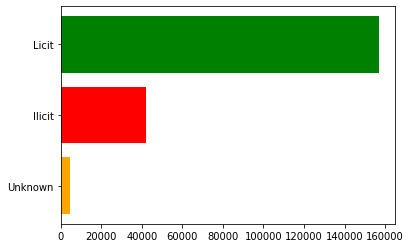

In [10]:
classes_df.loc[classes_df['class'] == 'unknown', 'class'] = 3
group_class = classes_df.groupby('class').count()
plt.barh(['Unknown', 'Ilicit', 'Licit'], group_class['txId'].values, color=['orange', 'r', 'g'] )

In [11]:
classes_df['class'].value_counts()

3    157205
2     42019
1      4545
Name: class, dtype: int64

Text(0.5, 1.0, 'Number of transactions by Time step')

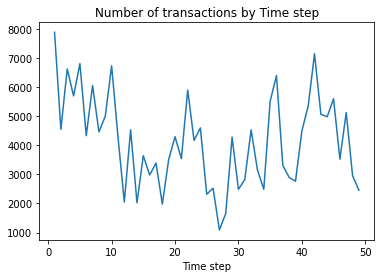

In [12]:
group_feature = features_df.groupby('Time step').count()
group_feature['txId'].plot()
plt.title('Number of transactions by Time step')

In [13]:
df_class_feature = pd.merge(classes_df, features_df)
df_class_feature.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,1076,3,48,-0.168500,0.270909,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,...,0.073047,-0.039637,1.461330,1.461369,0.018279,0.470019,1.216796,1.151607,1.519700,1.521399
1,2534,2,6,-0.170834,-0.131425,1.018602,0.028105,0.055376,0.054722,-0.061584,...,1.228858,0.379357,0.955101,0.459257,-0.098889,-0.087490,-0.099080,-0.122137,-0.379970,-0.379288
2,3181,2,34,1.305212,-0.210553,-1.756361,-0.121970,97.300650,-0.113002,-0.061584,...,1.348450,1.590664,0.059948,0.113967,-0.098889,1.969527,0.037532,-0.131010,0.006994,0.017772
3,3321,3,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.500080,0.241128,0.241406,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
4,3889,3,48,-0.086232,-0.101835,-0.646376,-0.121970,17.046997,-0.113002,-0.061584,...,0.501062,0.362510,0.082065,0.114773,-0.098889,8.948005,1.024948,-0.009570,-0.080708,-0.123601


In [14]:
group_class_feature = df_class_feature.groupby(['Time step', 'class']).count()
group_class_feature = group_class_feature['txId'].reset_index().rename(columns={'txId': 'count'})#unstack()
group_class_feature.head()

,Time step,class,count
0,1,1,17
1,1,2,2130
2,1,3,5733
3,2,1,18
4,2,2,1099


In [15]:
group_class_feature.shape

(147, 3)

<AxesSubplot:xlabel='Time step', ylabel='count'>

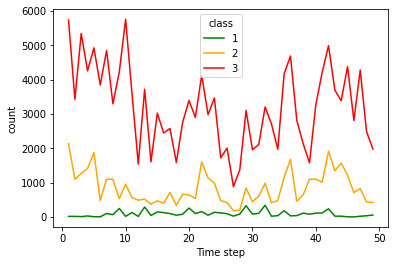

In [16]:
sns.lineplot(x='Time step', y='count', hue='class', data = group_class_feature, palette=['g', 'orange', 'r'] )

Text(0, 0.5, 'Transaction')

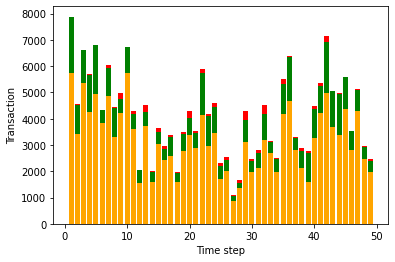

In [18]:
class1 = group_class_feature[group_class_feature['class'] == 1]
class2 = group_class_feature[group_class_feature['class'] == 2]
class3 = group_class_feature[group_class_feature['class'] == 3 ]

p1 = plt.bar(class3['Time step'], class3['count'], color = 'orange')

p2 = plt.bar(class2['Time step'], class2['count'], color='g',
             bottom=class3['count'])

p3 = plt.bar(class1['Time step'], class1['count'], color='r',
             bottom=np.array(class3['count'])+np.array(class2['count']))

plt.xlabel('Time step')
plt.ylabel('Transaction')

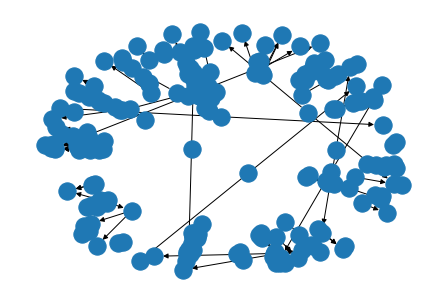

In [20]:
ilicit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == 1), 'txId']
ilicit_edges = edges_df.loc[edges_df['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

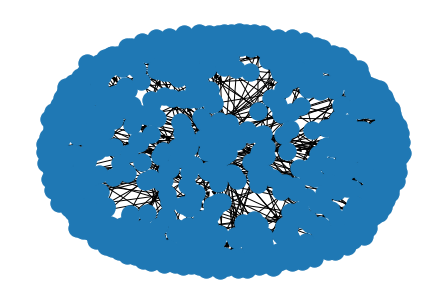

In [21]:
licit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == 2), 'txId']
licit_edges = edges_df.loc[edges_df['txId1'].isin(licit_ids)]

graph = nx.from_pandas_edgelist(licit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)